In [75]:
import pandas as pd
import matplotlib.pyplot as plt

pumpkins = pd.read_csv('US-pumpkins.csv')
pumpkins = pumpkins[pumpkins['Package'].str.contains('bins', case = True, regex = True)]
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [76]:
pumpkins.isnull().sum()

City Name             0
Type               1217
Package               0
Variety               5
Sub Variety        1220
Grade              1227
Date                  0
Low Price             0
High Price            0
Mostly Low           69
Mostly High          69
Origin                3
Origin District    1124
Item Size            87
Color               392
Environment        1227
Unit of Sale       1086
Quality            1227
Condition          1227
Appearance         1227
Storage            1227
Crop               1227
Repack                0
Trans Mode         1227
Unnamed: 24        1227
Unnamed: 25        1158
dtype: int64

In [77]:
new_columns = ['Package', 'Month', 'Low Price', 'High Price','Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns],axis=1)

pumpkins

,Package,Date,Low Price,High Price
0,24 inch bins,4/29/17,270.0,280.0
1,24 inch bins,5/6/17,270.0,280.0
2,24 inch bins,9/24/16,160.0,160.0
3,24 inch bins,9/24/16,160.0,160.0
4,24 inch bins,11/5/16,90.0,100.0
...,...,...,...,...
1718,24 inch bins,9/30/16,135.0,135.0
1753,36 inch bins,9/26/16,275.0,275.0
1754,36 inch bins,9/27/16,275.0,275.0
1755,36 inch bins,9/28/16,275.0,275.0


In [78]:
price = (pumpkins['Low Price'] + pumpkins['High Price'])/2
month = pd.DatetimeIndex(pumpkins['Date']).month

print(price,"\n Above value Price\n")
print(month,"\n Above value month\n")

0       275.0
1       275.0
2       160.0
3       160.0
4        95.0
        ...  
1718    135.0
1753    275.0
1754    275.0
1755    275.0
1756    275.0
Length: 1227, dtype: float64 
 Above value Price

Int64Index([ 4,  5,  9,  9, 11, 11,  9,  9, 10, 10,
            ...
             9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
           dtype='int64', name='Date', length=1227) 
 Above value month



In [79]:
new_pumpkins = pd.DataFrame({'Month':month, 'Package': pumpkins['Package'], 'Low Price' : pumpkins['Low Price'], 'High Price' : pumpkins['High Price'], 'Price': price})

new_pumpkins

,Month,Package,Low Price,High Price,Price
0,4,24 inch bins,270.0,280.0,275.0
1,5,24 inch bins,270.0,280.0,275.0
2,9,24 inch bins,160.0,160.0,160.0
3,9,24 inch bins,160.0,160.0,160.0
4,11,24 inch bins,90.0,100.0,95.0
...,...,...,...,...,...
1718,9,24 inch bins,135.0,135.0,135.0
1753,9,36 inch bins,275.0,275.0,275.0
1754,9,36 inch bins,275.0,275.0,275.0
1755,9,36 inch bins,275.0,275.0,275.0


In [80]:
new_pumpkins.loc[new_pumpkins['Package'].str.contains('24'),'Price'] = price*(1.2)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('36'),'Price'] = price/(1.5)

new_pumpkins

,Month,Package,Low Price,High Price,Price
0,4,24 inch bins,270.0,280.0,330.000000
1,5,24 inch bins,270.0,280.0,330.000000
2,9,24 inch bins,160.0,160.0,192.000000
3,9,24 inch bins,160.0,160.0,192.000000
4,11,24 inch bins,90.0,100.0,114.000000
...,...,...,...,...,...
1718,9,24 inch bins,135.0,135.0,162.000000
1753,9,36 inch bins,275.0,275.0,183.333333
1754,9,36 inch bins,275.0,275.0,183.333333
1755,9,36 inch bins,275.0,275.0,183.333333


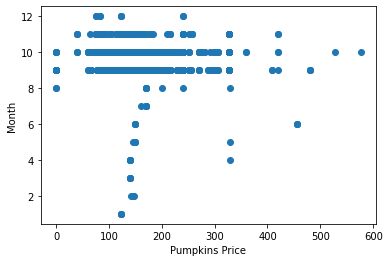

In [81]:
price  = new_pumpkins.Price
month = new_pumpkins.Month

plt.scatter(price, month)
plt.ylabel('Month')
plt.xlabel('Pumpkins Price')
plt.show()

Text(0, 0.5, 'Price of pumpkins')

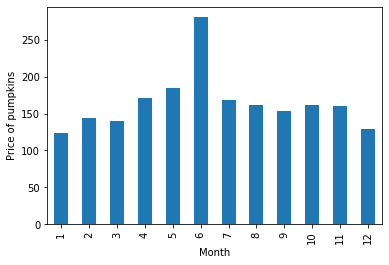

In [82]:
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind = 'bar')
plt.ylabel("Price of pumpkins")